# Classe Arbre234

In [25]:
from bisect import bisect_left
from graphviz import Digraph

class Noeud234:
    def __init__(self, cles, arbres, parent=None):
        self.cles = cles      # Liste des clés
        self.arbres = arbres  # Liste des sous-arbres
        self.parent = parent


class Arbre234:
    def __init__(self):
        self.racine = None

    # PRIMITIVES
    def EstVide(self):
        '''Arbre234 -> bool'''
        return self.racine is None
    
    def EstFeuille(self):
        '''Arbre234 -> bool'''
        return self.SsA_i(0).EstVide()
    
    def Contenu(self):
        '''Arbre234 -> list[int]
        Retourne la liste des clés de l'arbre'''
        return self.racine.cles
    
    def SousArbres(self):
        '''Arbre234 -> list[Arbre234]
        Retourne la liste des sous-arbres de l'arbre'''
        return self.racine.arbres
        
    def Pere(self):
        '''Arbre234 -> Arbre234'''
        return self.racine.parent

    def Degre(self):
        '''Arbre234 -> int'''
        return len(self.SousArbres())
    
    def SsA_i(self, i):
        '''Arbre234 * int -> Arbre234
        Retourne le i-ème sous-arbre de l'arbre'''
        if (i >= 0 and i <= 3):
            return self.SousArbres()[i]

    def EstDans(self, x):
        '''Arbre234 * int -> bool'''
        return x in self.Contenu()
    
    def Elem(self, i):
        '''Arbre234 * int -> int
        Retourne la i-ème clé de l'arbre'''
        if (i >= 0 and i <= 2):
            return self.Contenu()[i]
    
    def Index(self):
        '''Arbre234 -> int
        Retourne l'indice de l'arbre dans son père'''
        return self.Pere().SousArbres().index(self)
    
    def Min(self):
        '''Arbre234 -> int
        Retourne la plus petite clé de l'arbre'''
        return self.Elem(0)
    
    def Max(self):
        '''Arbre234 -> int
        Retourne la plus grande clé de l'arbre'''
        return self.Elem(self.Degre() - 2)
    
    def Dupplique(self, parent=None):
        '''Arbre234 -> Arbre234
        Retourne une copie de l'arbre'''
        A = Arbre234()

        if self.EstVide():
            return A
        
        sous_arbres = []
        contenus = self.Contenu().copy()
        for i in range(self.Degre()):
            sous_arbres.append(self.SsA_i(i).Dupplique(A))
        A.racine = Noeud234(contenus, sous_arbres, parent)
        return A

    # AFFICHAGE
    def afficher_arbre(self, niveau=0):
        if self.racine is not None:
            print("  " * niveau, self.Contenu())
            for sous_arbre in self.SousArbres():
                if sous_arbre is not None:
                    sous_arbre.afficher_arbre(niveau + 1)

    
    # FONCTIONS AUXILIAIRES  
    def EcR(self, x, P=None):
        '''Arbre234 -> Noeud234
        Effectue un éclatement'''
        G = Arbre234()
        G.racine = Noeud234([self.Elem(0)], [self.SsA_i(0), self.SsA_i(1)])
        D = Arbre234()
        D.racine = Noeud234([self.Elem(2)], [self.SsA_i(2), self.SsA_i(3)])

        if not(self.EstFeuille()): # Les enfants des feuilles sont des arbres vides et donc n'ont pas de parent
            self.SsA_i(0).racine.parent = G
            self.SsA_i(1).racine.parent = G
            self.SsA_i(2).racine.parent = D
            self.SsA_i(3).racine.parent = D

        if P is None: # Eclatement à la racine
            A = Arbre234()
            A.racine = Noeud234([self.Elem(1)], [G, D])
            G.racine.parent = A
            D.racine.parent = A
            return A.racine

        indice = bisect_left(P.Contenu(), self.Elem(1)) # Eclatement d'un noeud autre que la racine
        P.Contenu().insert(indice, self.Elem(1))
        indiceX = bisect_left(P.Contenu(), x)
        G.racine.parent = P
        D.racine.parent = P
        if indice == indiceX: # Après l'ajout de l'élément du milieu du noeud eclaté, si l'indice ne change pas cela veut dire que x est inférieur à l'élément du milieu et donc on renvoie le sous arbre gauche
            P.SousArbres().insert(indice, D) # On insère d'abord le sous arbre droit puis le sous arbre gauche, la propriété de l'arbre234 ne sera plus respectée, problème résolu avec le swap dans AjoutSimple
            return G.racine
        
        P.SousArbres().insert(indice, G) # Sinon on renvoie le sous arbre droit
        return D.racine
    

    def AjoutSimple(self, x, parent=None):
        '''Arbre234 * int -> Arbre234
        Renvoie l'arbre après l'ajout de x à la racine'''
        if self.EstDans(x):
            return 
        
        if self.Degre() == 4:
            self.racine = self.EcR(x, parent)

        if self.EstFeuille():
            A = self.Dupplique(parent)
            indice = bisect_left(A.Contenu(), x)
            A.Contenu().insert(indice, x)
            A.SousArbres().insert(indice, Arbre234())
            return A
        
        A = Arbre234()
        A.racine = Noeud234(self.Contenu().copy(), [], parent)
        indice = bisect_left(A.Contenu(), x) # correspond à l'indice du sous arbre où faut insérer x

        for (i, a) in enumerate(self.SousArbres()):
            if i == indice:
                A.SousArbres().append(a.AjoutSimple(x, A))
                if A.Degre() > 1 and (A.SsA_i(A.Degre() - 1).Elem(0) < A.SsA_i(A.Degre() - 2).Elem(0)): # On compare les clés des 2 derniers sous arbres
                    A.SousArbres()[A.Degre() - 1], A.SousArbres()[ A.Degre() - 2] = A.SousArbres()[ A.Degre() - 2], A.SousArbres()[ A.Degre() - 1] # swap 
            else:
                A.SousArbres().append(a.Dupplique(A))
        return A
    
    
    def MiseAJour(self, V, i, monte, descend):
        V.Contenu().remove(monte)
        self.Pere().Contenu()[i] = monte
        self.Contenu().append(descend)

    def InverseEcR(self, G, D, i):
        g = G.Elem(0)
        A1 = G.SsA_i(0)
        A2 = G.SsA_i(1)
        if self.Degre() == 2 and self.Pere() is None:
            d = D.Elem(0)
            A3 = D.SsA_i(0)
            A4 = D.SsA_i(1)
            self.SousArbres().remove(G)
            self.SousArbres().remove(D)
            self.Contenu().append(d)
            self.Contenu().insert(0, g)
            self.SousArbres().append(A1)
            self.SousArbres().append(A2)
            self.SousArbres().append(A3)
            self.SousArbres().append(A4)
            return
        
        p = self.Elem(i)
        self.SousArbres().remove(G)
        self.Contenu().remove(p)
        D.Contenu().insert(0, p)
        D.Contenu().insert(0, g)
        self.SousArbres().insert(0, A2)
        self.SousArbres().insert(0, A1)



    # OPERATIONS DE BASE
    def Ajout(self, x):
        '''Arbre234 * int -> Arbre234
        Renvoie l'arbre après l'ajout de x'''
        if self.EstVide():
            A = Arbre234()
            A.racine = Noeud234([x], [Arbre234(), Arbre234()])
            return A
        
        return self.AjoutSimple(x)
    

    def Recherche(self, x):
        if self.EstVide():
            return None
        
        if self.EstDans(x):
            return self
        
        if x < self.Elem(0):
            return self.SsA_i(0).Recherche(x)
        elif self.Degre() == 2 or x < self.Elem(1):
            return self.SsA_i(1).Recherche(x)
        elif self.Degre() == 3 or x < self.Elem(2):
            return self.SsA_i(2).Recherche(x)
        else:
            return self.SsA_i(3).Recherche(x)
        

    def graphviz(self):
        def creer_label_noeud(A):
            noeud_label = ""
            sections = []

            # Commencer par un espace vide pour les sous-arbres
            sections.append(f' <f0> ')

            # Ajouter les clés et les espaces vides pour les sous-arbres entre chaque clé
            for i, cle in enumerate(A.Contenu()):
                sections.append(f' <f{i*2+1}> {str(cle)} ')
                sections.append(f' <f{i*2+2}> ')

            noeud_label = '|'.join(sections)
            return noeud_label

        def ajouter_noeuds_et_arcs(A, graph, parent_id=None, parent_port=''):
            if A.EstVide():
                return
            
            noeud_label = creer_label_noeud(A)
            noeud_id = f'node{abs(hash(A)) % (10 ** 8)}'  # Génère un ID unique plus court
            graph.node(noeud_id, label=noeud_label)

            if parent_id is not None and parent_port != '':
                graph.edge(f'{parent_id}:{parent_port}', noeud_id)

            sous_arbres = A.SousArbres()
            for i, arbre in enumerate(sous_arbres):
                if arbre.EstVide():
                    continue
                port = f'f{i*2}'  # Connecter aux ports des sous-arbres
                ajouter_noeuds_et_arcs(arbre, graph, noeud_id, port)

        g = Digraph('G', node_attr={'shape': 'record', 'height': '.1'})
        ajouter_noeuds_et_arcs(self, g)
        return g


    
    

 [8]
   [3, 6]
     [1, 2]
     [4, 5]
     [7]
   [10, 13, 15]
     [9]
     [11, 12]
     [14]
     [16, 17]


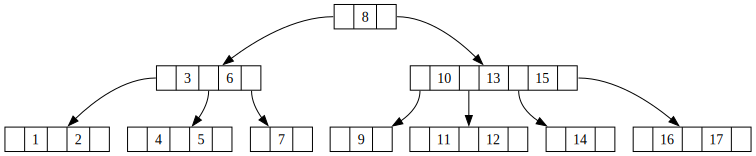

In [26]:
A = Arbre234()
A = A.Ajout(8)
A = A.Ajout(3)
A = A.Ajout(2)
A = A.Ajout(4)
A = A.Ajout(1)
A = A.Ajout(15)
A = A.Ajout(10)
A = A.Ajout(9)


A = A.Ajout(11)
A = A.Ajout(7)
A = A.Ajout(6)
A = A.Ajout(13)
A = A.Ajout(12)
A = A.Ajout(5)
A = A.Ajout(14)
A = A.Ajout(16)
A = A.Ajout(17)


A.afficher_arbre()
print(" ======================== ")
g = A.graphviz()
g




In [27]:
# A = A.Ajout(10)
# print(" ======================== ")
A.afficher_arbre()
print(" ======================== ")

 [8]
   [3, 6]
     [1, 2]
     [4, 5]
     [7]
   [10, 13, 15]
     [9]
     [11, 12]
     [14]
     [16, 17]
